# Module 3 : Performance measurements of Logistic regression

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = pd.read_csv("Lung.csv")

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [7]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['GENDER','LUNG_CANCER']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [8]:
X = df.drop(labels='LUNG_CANCER', axis=1)
#Response variable
y = df.loc[:,'LUNG_CANCER'] 

In [9]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Logistic Regression :

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictR))

print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        81
           1       0.92      0.89      0.91        81

    accuracy                           0.91       162
   macro avg       0.91      0.91      0.91       162
weighted avg       0.91      0.91      0.91       162


Confusion Matrix result of Logistic Regression is:
 [[75  6]
 [ 9 72]]

Sensitivity :  0.9259259259259259

Specificity :  0.8888888888888888

Cross validation test results of accuracy:
[0.88888889 0.88888889 0.93518519 0.88888889 0.93518519]

Accuracy result of Logistic Regression is: 90.74074074074075


In [11]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Lung disease",fontsize=15)
    plt.legend(b,data,fontsize=9)

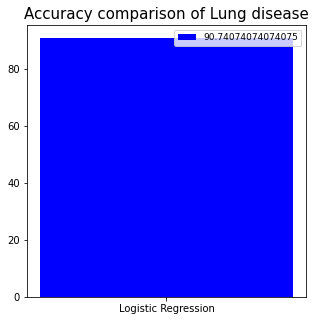

In [12]:
graph()

In [13]:
TP = cm[0][0]
FP = cm[1][0]
FN = cm[1][1]
TN = cm[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 75
True Negative : 6
False Positive : 9
False Negative : 72

True Positive Rate : 0.5102040816326531
True Negative Rate : 0.4
False Positive Rate : 0.6
False Negative Rate : 0.4897959183673469

Positive Predictive Value : 0.8928571428571429
Negative predictive value : 0.07692307692307693


Confusion matrix-LogisticRegression:
[[75  6]
 [ 9 72]]


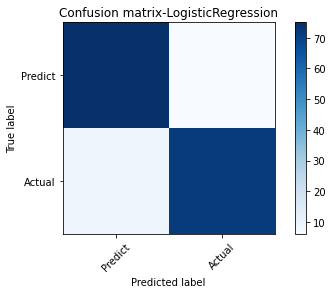

In [14]:
def plot_confusion_matrix(cm2, title='Confusion matrix-LogisticRegression', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-LogisticRegression:')
print(cm2)
plot_confusion_matrix(cm2)